In [123]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import itertools
import collections
import os
import random
from pylab import rcParams
from matplotlib import cm
plt.rcParams.update({'font.size': 31})

In [120]:
def erGraph(n, p):
    
    if (p > 1 or p < 0):
        print("no no no no NO. Probability -> [0,1]")
    
    # create graph and add in all the nodes
    G = nx.Graph()
    for i in range(n):
        G.add_node(i)
        
    # get all permutations of length 2 from the set of all nodes
    # causes major slow down for large n
    pairs = list(itertools.permutations(list(G.nodes), 2))
    
    # generate edge with probability P
    numPairs = len(pairs)
    for i in range(numPairs):
        draw = uniform(0,1)
        if (draw<p):
            G.add_edge(pairs[i][0],pairs[i][1])
            
    return G

[(0, 169), (1, 196), (2, 197), (3, 189), (4, 219), (5, 206), (6, 201), (7, 197), (8, 196), (9, 194), (10, 194), (11, 185), (12, 190), (13, 176), (14, 190), (15, 207), (16, 194), (17, 190), (18, 194), (19, 198), (20, 197), (21, 200), (22, 202), (23, 182), (24, 201), (25, 209), (26, 178), (27, 193), (28, 213), (29, 186), (30, 191), (31, 204), (32, 203), (33, 222), (34, 176), (35, 192), (36, 187), (37, 200), (38, 219), (39, 186), (40, 189), (41, 192), (42, 201), (43, 187), (44, 190), (45, 218), (46, 204), (47, 206), (48, 171), (49, 188), (50, 191), (51, 186), (52, 225), (53, 186), (54, 174), (55, 203), (56, 194), (57, 200), (58, 185), (59, 196), (60, 204), (61, 205), (62, 199), (63, 194), (64, 209), (65, 202), (66, 208), (67, 216), (68, 183), (69, 185), (70, 201), (71, 219), (72, 233), (73, 191), (74, 175), (75, 198), (76, 190), (77, 203), (78, 188), (79, 207), (80, 199), (81, 197), (82, 208), (83, 193), (84, 221), (85, 194), (86, 196), (87, 201), (88, 200), (89, 225), (90, 201), (91, 204

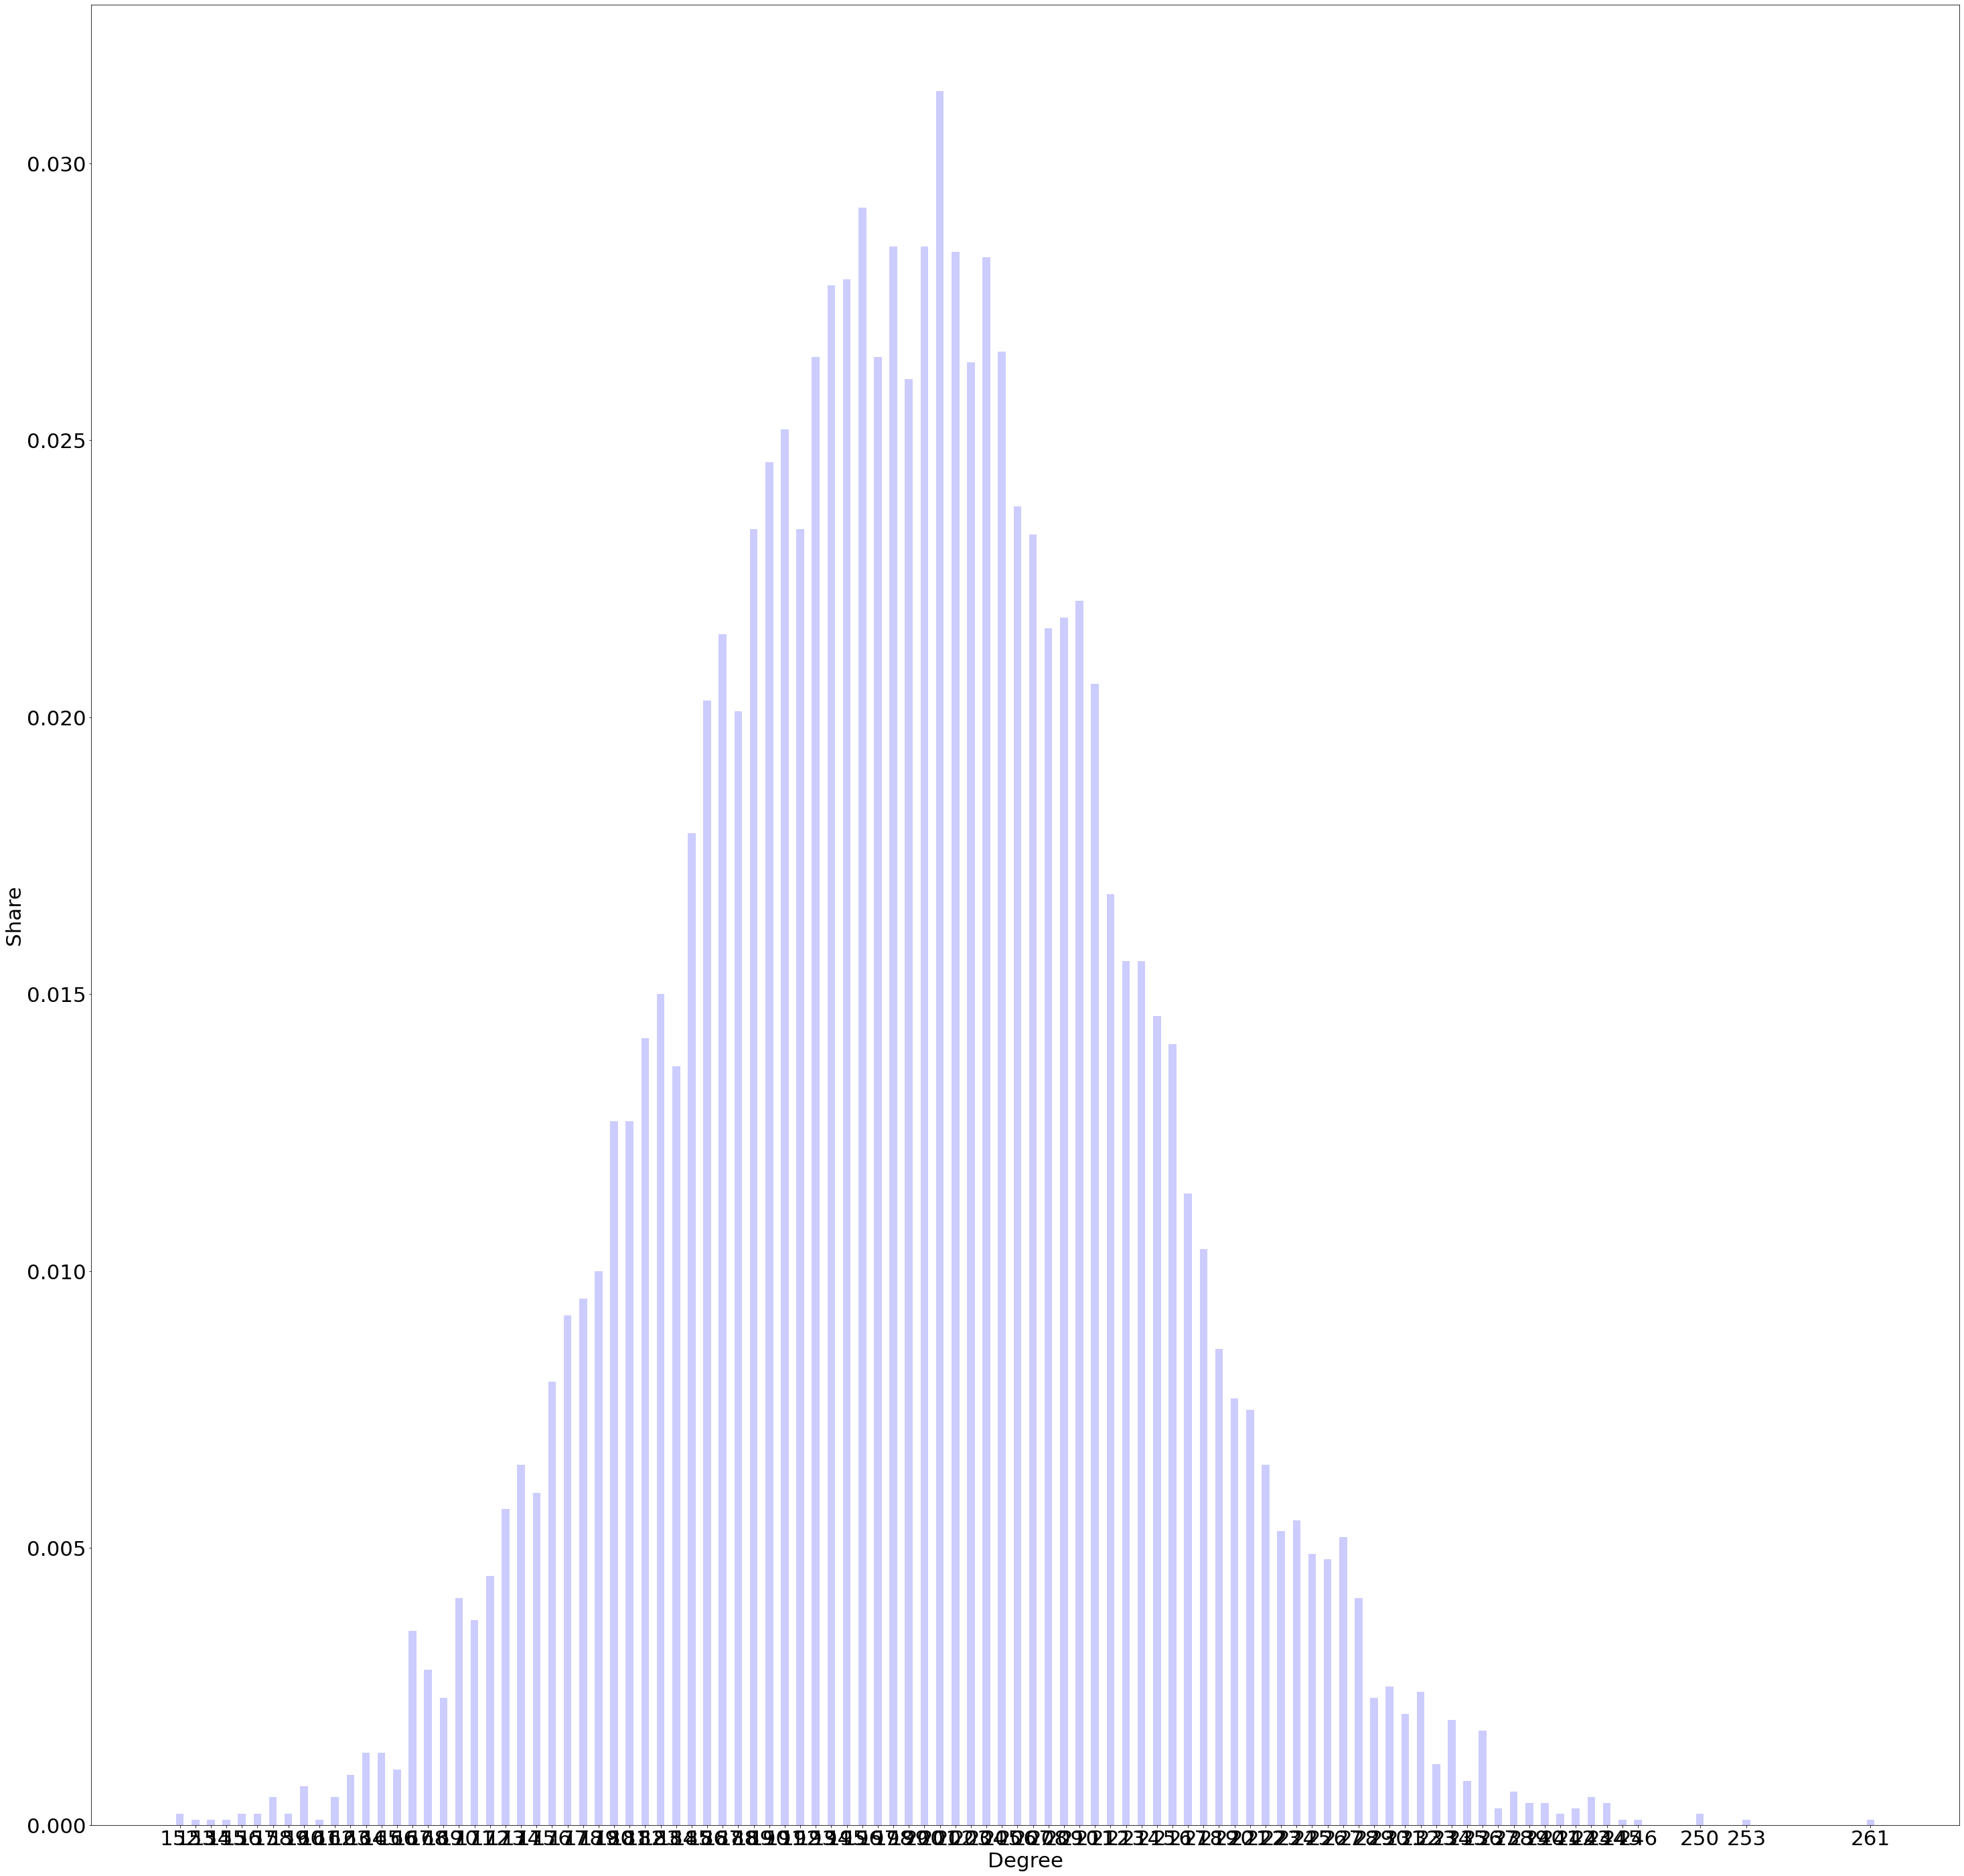

In [164]:
numNodes = 10000
probEdge = 0.01

# generate erdos-renyi graph with n, p
gNP = erGraph(numNodes, probEdge)

# get node degrees and sort them
gNPdeg = sorted([d for n, d in gNP.degree()], reverse=True)

# sort out how many nodes correspond to each degree
degreeCount = collections.Counter(gNPdeg)
deg, cnt = zip(*degreeCount.items())

cnt1 = []

for i in cnt:
    cnt1.append(i/numNodes)
    
fig, ax = plt.subplots(figsize=(50,50))
plt.bar(deg, cnt1, width=.5, color='#CCCCFF')
plt.ylabel("Share")
plt.xlabel("Degree")
ax.set_xticks([d for d in deg])
ax.set_xticklabels(deg)
plt.savefig("n300p02.png")

In [167]:
numNodes = 10000
probEdge = 0.001

# generate erdos-renyi graph with n, p
gNP = erGraph(numNodes, probEdge)

largestComp = max(nx.connected_components(gNP), key=len)
print(len(largestComp))

10001


In [182]:
G = nx.fast_gnp_random_graph(10000, 0.00011)
largestComp = max(nx.connected_components(G), key=len)
print(len(largestComp))

1718


In [201]:
G = nx.gnp_random_graph(10000, .000102)
largestComp = max(nx.connected_components(G), key=len)
print(len(largestComp))

271
